In [1]:
# Mengabaikan peringatan
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Visualisasi dan manipulasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
# Konfigurasi
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)
# Mengatur matplotlib untuk tampil di dalam notebook dan menampilkan grafik di bawah sel yang sesuai.
%matplotlib inline  

# Seleksi model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Library Deep Learning (DL)
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical

# Convolutional Neural Network (CNN)
from keras.layers import Dropout, Flatten, Activation, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# Memanipulasi gambar terkompresi dan mendapatkan array numpy dari nilai piksel gambar.
import cv2                  
import numpy as np  
import itertools
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


In [2]:
X=[]
Z=[]
IMG_SIZE = 300
Orange='/kaggle/input/darah-menstruasi/Orange'
Pink='/kaggle/input/darah-menstruasi/Pink'
Abu_Abu='/kaggle/input/darah-menstruasi/abu-abu'
Coklat='/kaggle/input/darah-menstruasi/coklat'
Hitam='/kaggle/input/darah-menstruasi/hitam'
Merah='/kaggle/input/darah-menstruasi/merah'



In [3]:
def assign_label(img,warna_type):
    return warna_type

In [4]:
def make_train_data(warna_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,warna_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_train_data('Orange',Orange)
print(len(X))
make_train_data('Pink',Pink)
print(len(X))
make_train_data('Abu_Abu',Abu_Abu)
print(len(X))
make_train_data('Coklat',Coklat)
print(len(X))
make_train_data('Hitam',Hitam)
print(len(X))
make_train_data('Merah',Merah)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 124.32it/s]


100


100%|██████████| 100/100 [00:00<00:00, 142.16it/s]


200


100%|██████████| 100/100 [00:00<00:00, 140.49it/s]


300


100%|██████████| 100/100 [00:00<00:00, 152.91it/s]


400


100%|██████████| 100/100 [00:00<00:00, 145.84it/s]


500


100%|██████████| 100/100 [00:00<00:00, 137.14it/s]

600


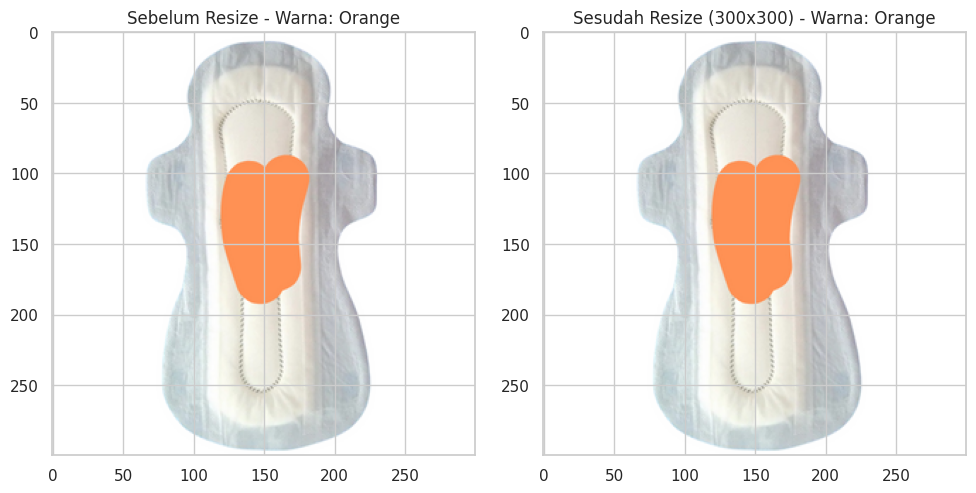

In [6]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

# Menampilkan gambar sebelum dilakukan resize
img_not_resized = cv2.imread(os.path.join(Orange, os.listdir(Orange)[1]), cv2.IMREAD_COLOR)
img_not_resized = cv2.cvtColor(img_not_resized, cv2.COLOR_BGR2RGB)
ax[0].imshow(img_not_resized)
ax[0].set_title('Sebelum Resize - Warna: ' + Z[1])

# Menampilkan gambar sesudah dilakukan resize
ax[1].imshow(X[1])
ax[1].set_title('Sesudah Resize ({}x{}) - Warna: {}'.format(IMG_SIZE, IMG_SIZE, Z[1]))

plt.tight_layout()
plt.show()

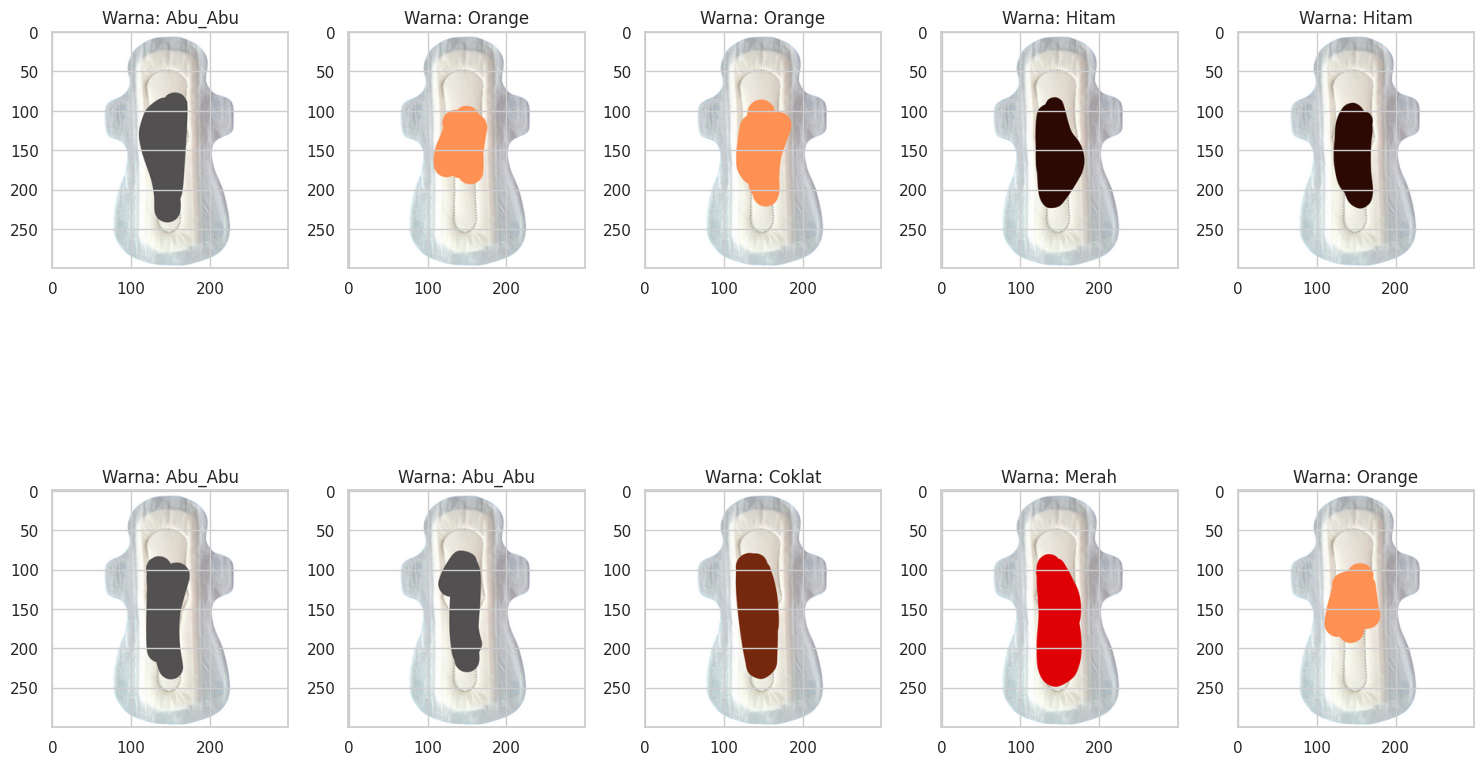

In [7]:
fig,ax=plt.subplots(2,5)
fig.set_size_inches(15,15)
for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Warna: '+Z[l])
        plt.tight_layout()

In [8]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,6)
X=np.array(X)
X=X/255

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
datagen = ImageDataGenerator(
        rotation_range=10,  # Memilih rentang acak untuk memutar citra dalam derajat tertentu. Dalam kasus ini, citra dapat diputar secara acak hingga 10 derajat
        zoom_range = 0.1, # Memberikan perbesaran acak pada citra dalam rentang tertentu. Dalam kasus ini, citra dapat diperbesar secara acak hingga 10% 
        width_shift_range=0.2,  # Menggeser citra secara acak secara horizontal hingga 20%
        height_shift_range=0.2,  # Menggeser citra secara acak secara vertikal hingga 20%
        horizontal_flip=True)  # secara acak membalik citra secara horizontal
datagen.fit(x_train)

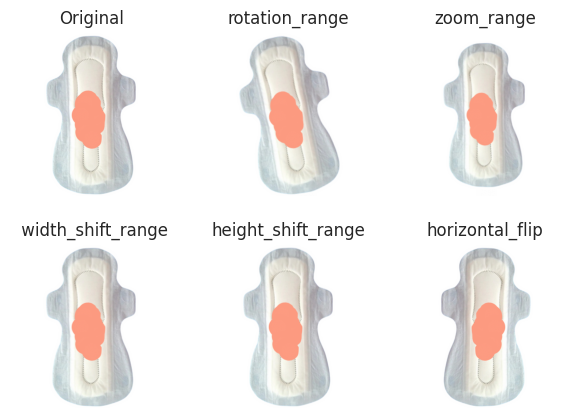

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Pilih satu contoh citra dari dataset
original_img = x_train[0]

# Menampilkan gambar sebelum augmentasi
plt.subplot(2, 3, 1)
plt.imshow(original_img)
plt.title('Original')
plt.axis('off')

# Mengaplikasikan augmentasi rotation_range
rotation_angle = 10
augmented_img = datagen.apply_transform(original_img, {'theta': rotation_angle})
plt.subplot(2, 3, 2)
plt.imshow(augmented_img)
plt.title('rotation_range')
plt.axis('off')

# Mengaplikasikan augmentasi zoom_range
zoom_range_factor = 0.1
augmented_img = datagen.apply_transform(original_img, {'zx': 1 + zoom_range_factor, 'zy': 1 + zoom_range_factor})
plt.subplot(2, 3, 3)
plt.imshow(augmented_img)
plt.title('zoom_range')
plt.axis('off')

# Mengaplikasikan augmentasi width_shift_range
width_shift_factor = 0.2
augmented_img = datagen.apply_transform(original_img, {'tx': width_shift_factor})
plt.subplot(2, 3, 4)
plt.imshow(augmented_img)
plt.title(' width_shift_range')
plt.axis('off')

# Mengaplikasikan augmentasi height_shift_range
height_shift_factor = 0.2
augmented_img = datagen.apply_transform(original_img, {'ty': height_shift_factor})
plt.subplot(2, 3, 5)
plt.imshow(augmented_img)
plt.title('height_shift_range')
plt.axis('off')

# Mengaplikasikan augmentasi horizontal_flip
augmented_img = datagen.apply_transform(original_img, {'flip_horizontal': True})
plt.subplot(2, 3, 6)
plt.imshow(augmented_img)
plt.title('horizontal_flip')
plt.axis('off')

plt.show()


In [12]:
np.random.seed(7)
rn.seed(7)
tf.random.set_seed(7)

In [13]:
from tensorflow.keras.applications import MobileNet

# Memuat model InceptionResNetV2 yang telah dilatih sebelumnya
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Mematikan pembelajaran pada layer-layer yang telah dilatih sebelumnya
mobilenet.trainable = False

# Membuat model baru
model = tf.keras.Sequential([
    mobilenet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Dense(6, activation='softmax')
])

17225924/17225924 [==============================] - 1s 0us/step


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 9, 9, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               5

In [15]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
import time
from tensorflow.keras.callbacks import Callback

# Callback untuk mengukur waktu training
class TimingCallback(Callback):
    def on_train_begin(self, logs=None):
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        end_time = time.time()
        elapsed_time = end_time - self.start_time
        minutes = int(elapsed_time / 60)
        seconds = int(elapsed_time % 60)
        print(f"\nTotal training time: {minutes} minutes {seconds} seconds")

# Main program
batch = 16
epoch = 50
step = np.ceil(x_train.shape[0] / batch)

# Callback untuk waktu training
timing_callback = TimingCallback()

History = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch),
                              epochs=epoch,
                              validation_data=(x_test, y_test),
                              verbose=1,
                              steps_per_epoch=step,
                              callbacks=[timing_callback])


Epoch 1/50
30/30 [==============================] - 22s 359ms/step - loss: 1.3516 - accuracy: 0.5417 - val_loss: 0.9813 - val_accuracy: 0.7417
Epoch 2/50
30/30 [==============================] - 9s 313ms/step - loss: 0.7837 - accuracy: 0.7542 - val_loss: 0.6580 - val_accuracy: 0.7250
Epoch 3/50
30/30 [==============================] - 9s 306ms/step - loss: 0.5577 - accuracy: 0.7833 - val_loss: 0.5298 - val_accuracy: 0.8000
Epoch 4/50
30/30 [==============================] - 9s 297ms/step - loss: 0.4373 - accuracy: 0.8438 - val_loss: 0.3853 - val_accuracy: 0.8000
Epoch 5/50
30/30 [==============================] - 9s 300ms/step - loss: 0.3547 - accuracy: 0.8500 - val_loss: 0.4417 - val_accuracy: 0.7750
Epoch 6/50
30/30 [==============================] - 9s 300ms/step - loss: 0.3471 - accuracy: 0.8500 - val_loss: 0.3313 - val_accuracy: 0.8500
Epoch 7/50
30/30 [==============================] - 9s 294ms/step - loss: 0.3301 - accuracy: 0.8521 - val_loss: 0.2900 - val_accuracy: 0.9000
Epoch

In [17]:
model.save('klasifikasiwarna.h5')

In [18]:
target_names = ['Orange','Pink','Abu-Abu','Coklat','Hitam','Merah']

In [19]:
Y_pred = model.predict_generator(x_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 1  0 16  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 19  4]
 [ 0  0  0  0  1 19]]


In [20]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Orange       0.95      1.00      0.97        19
        Pink       1.00      1.00      1.00        17
     Abu-Abu       1.00      0.94      0.97        17
      Coklat       1.00      1.00      1.00        24
       Hitam       0.95      0.83      0.88        23
       Merah       0.83      0.95      0.88        20

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [21]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


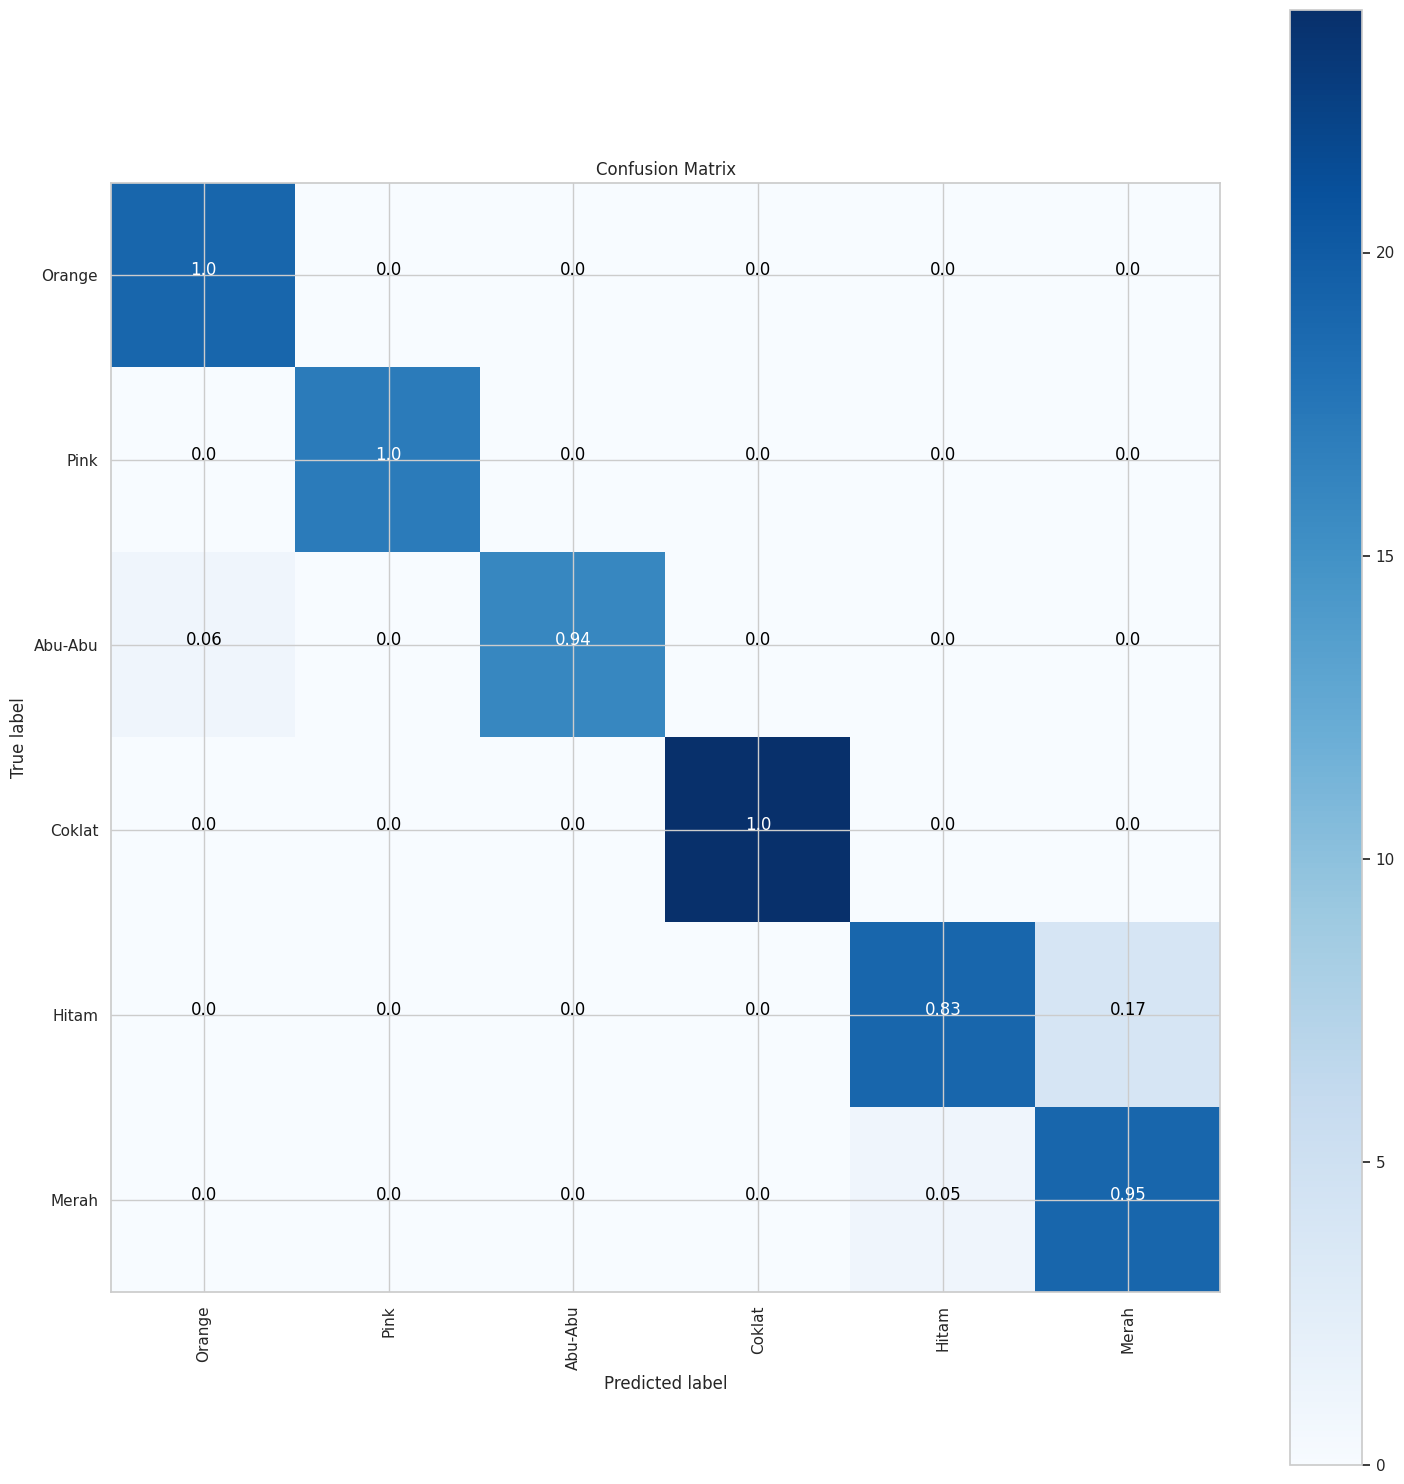

In [22]:
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

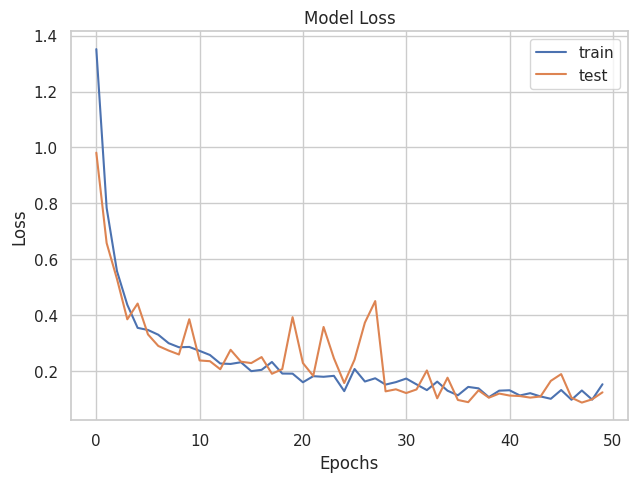

In [23]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

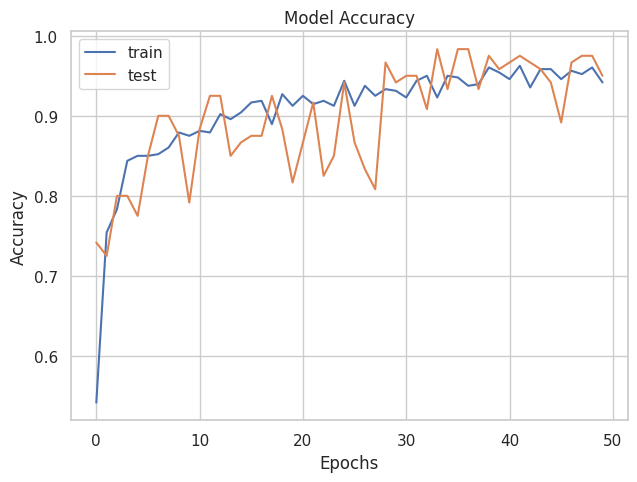

In [24]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Masukkan path file gambar:  /kaggle/input/darah-menstruasi/merah/101.png


1/1 [==============================] - 0s 350ms/step


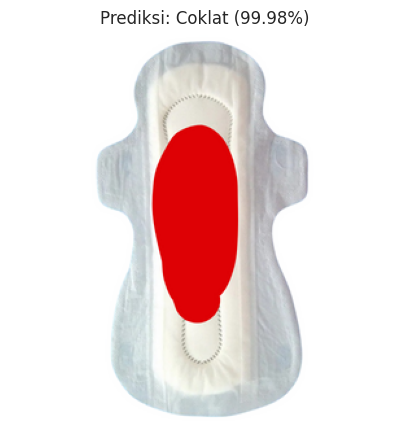

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Fungsi untuk mendapatkan label kelas berdasarkan indeks
def get_class_label(class_index):
    if class_index == 0:
        return "Orange"
    elif class_index == 1:
        return "Pink"
    elif class_index == 2:
        return "Abu-Abu"
    elif class_index == 3:
        return "Coklat"
    elif class_index == 4:
        return "Hitam"
    elif class_index == 5:
        return "Merah"


# Memuat gambar yang akan diprediksi
image_path = input("Masukkan path file gambar: ")

# Memuat gambar
img = image.load_img(image_path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Melakukan prediksi
predictions = model.predict(x)
class_index = np.argmax(predictions)
class_label = get_class_label(class_index)
confidence = predictions[0][class_index] * 100

# Menampilkan gambar dan hasil prediksi
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediksi: {class_label} ({confidence:.2f}%)")
plt.show()
